<a href="https://colab.research.google.com/github/LuizScarparo/DataScience/blob/main/TrabalhoDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/database.csv', sep=',', encoding='utf-8')
print("Colunas disponíveis:\n", df.columns.tolist(), "\n")

Colunas disponíveis:
 ['Jogador', 'Time', '#', 'Nação', 'Pos.', 'Idade', 'Min.', 'Gols', 'Assis.', 'PB', 'PT', 'TC', 'CaG', 'CrtsA', 'CrtV', 'Contatos', 'Div', 'Crts', 'Bloqueios', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'PrgP', 'Conduções', 'PrgC', 'Tent', 'Suc', 'Data'] 



In [19]:
for col in df.columns:
    if df[col].dtype == object:
        sample = df[col].dropna().astype(str)
        if not sample.empty and any(ch.isdigit() for ch in sample.iloc[0]):
            # remover % e substituir vírgula
            cleaned = df[col].astype(str).str.replace('%','').str.replace(',','.')
            # onde dá para converter em float
            df[col] = pd.to_numeric(cleaned, errors='coerce')

if 'apps' in df.columns:
    apps_split = df['apps'].astype(str).str.extract(r'^(?P[Titulares]\d+)(?:\((?P[Subs]\d+)\))?')
    df['Titulares'] = apps_split['Titulares'].astype(float)
    df['Substituições'] = apps_split['Subs'].fillna(0).astype(float)
else:
    print("Coluna 'apps' não encontrada.\n")

print("=== Dimensões ===", df.shape)
print("\n=== Info ===")
df.info()
print("\n=== Estatísticas Descritivas ===")
display(df.describe(include='all').T)


Coluna 'apps' não encontrada.

=== Dimensões === (11682, 33)

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Jogador    11682 non-null  object 
 1   Time       11682 non-null  object 
 2   #          11682 non-null  int64  
 3   Nação      11676 non-null  object 
 4   Pos.       11682 non-null  object 
 5   Idade      0 non-null      float64
 6   Min.       11681 non-null  float64
 7   Gols       11682 non-null  int64  
 8   Assis.     11682 non-null  int64  
 9   PB         11682 non-null  int64  
 10  PT         11682 non-null  int64  
 11  TC         11682 non-null  int64  
 12  CaG        11682 non-null  int64  
 13  CrtsA      11682 non-null  int64  
 14  CrtV       11682 non-null  int64  
 15  Contatos   11681 non-null  float64
 16  Div        11681 non-null  float64
 17  Crts       11682 non-null  int64  
 18  Bloqueios  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jogador,11682,652,Gabriel,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,11682,20,Palmeiras,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#,11682.0,NaN,NaN,NaN,22.246961,21.704869,1.0,8.0,17.0,28.0,200.0
Nação,11676,23,BRA,9032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pos.,11682,195,CB,1731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Idade,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min.,11681.0,NaN,NaN,NaN,62.515024,30.652831,1.0,32.0,75.0,90.0,90.0
Gols,11682.0,NaN,NaN,NaN,0.075929,0.281199,0.0,0.0,0.0,0.0,3.0
Assis.,11682.0,NaN,NaN,NaN,0.052902,0.232109,0.0,0.0,0.0,0.0,2.0
PB,11682.0,NaN,NaN,NaN,0.00642,0.081987,0.0,0.0,0.0,0.0,2.0


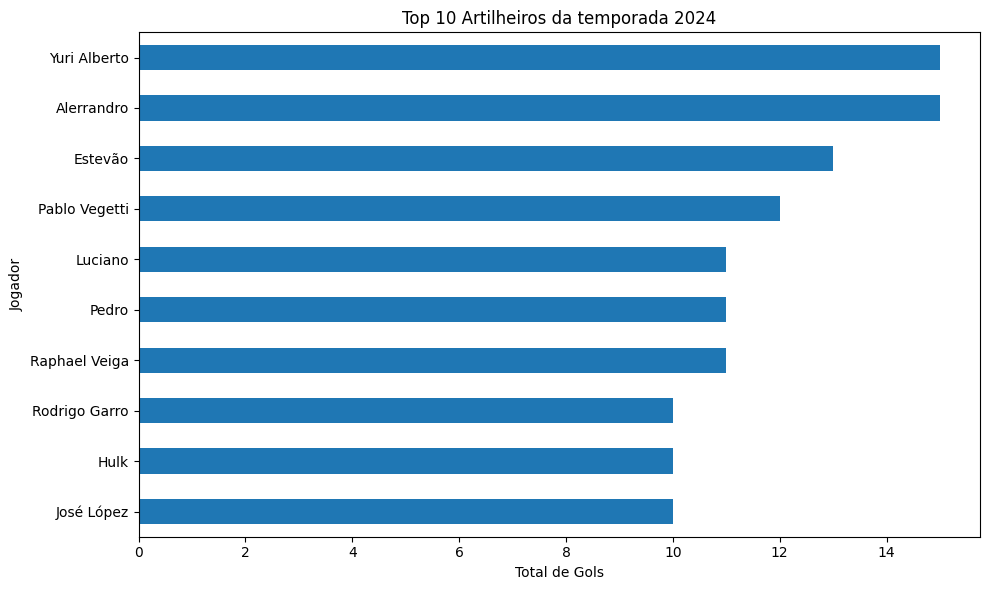

In [20]:
goals = df.groupby('Jogador')['Gols'].sum()
top10 = goals.sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 6))
top10.plot(kind='barh')
plt.title('Top 10 Artilheiros da temporada 2024')
plt.xlabel('Total de Gols')
plt.ylabel('Jogador')
plt.tight_layout()
plt.show()

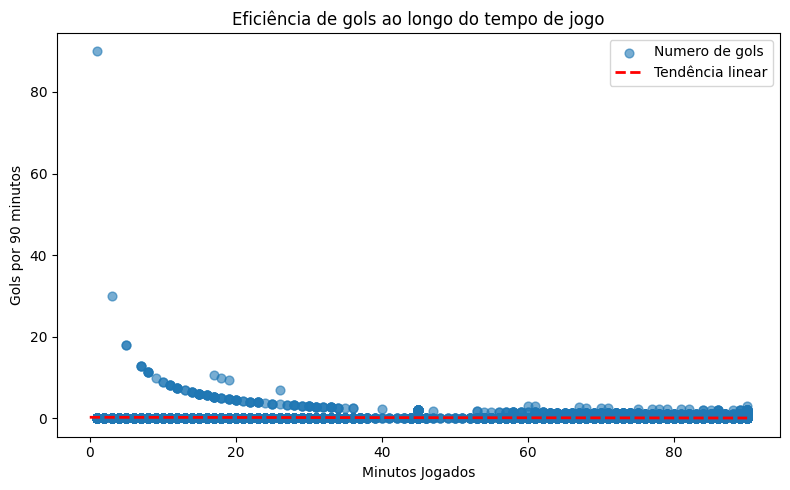

In [21]:
df['Gols_per90'] = df['Gols'] / (df['Min.'] / 90)

mask = df[['Min.', 'Gols_per90']].replace([np.inf, -np.inf], np.nan).dropna().index
x = df.loc[mask, 'Min.']
y = df.loc[mask, 'Gols_per90']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.6, s=40, label='Numero de gols')

m, b = np.polyfit(x, y, 1)

plt.plot(
    [0, x.max()],
    [b, m * x.max() + b],
    color='red',
    linewidth=2,
    linestyle='--',
    label='Tendência linear'
)

plt.xlabel('Minutos Jogados')
plt.ylabel('Gols por 90 minutos')
plt.title('Eficiência de gols ao longo do tempo de jogo')
plt.legend()
plt.tight_layout()
plt.show()


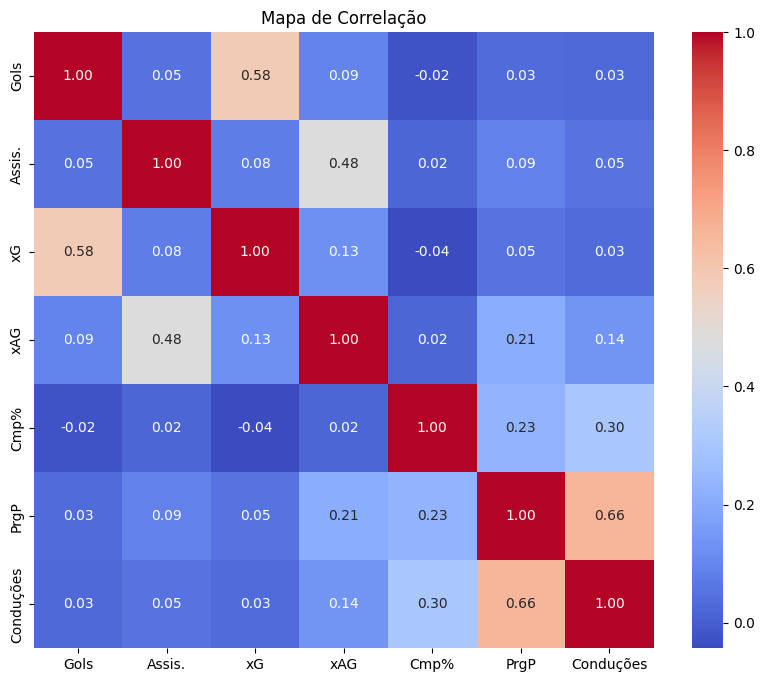

In [22]:
plt.figure(figsize=(10,8))
corr = df[['Gols','Assis.','xG','xAG','Cmp%','PrgP','Conduções']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

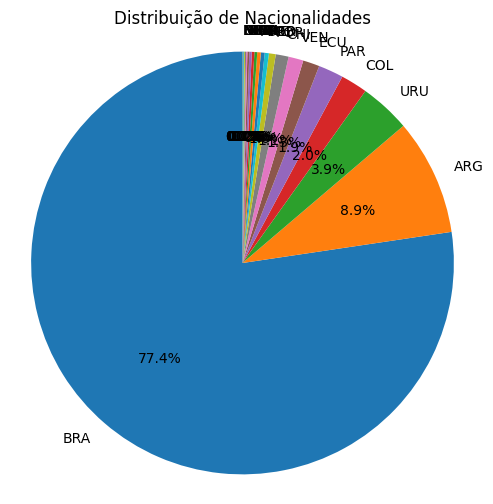

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df['Nação'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuição de Nacionalidades')
plt.show()


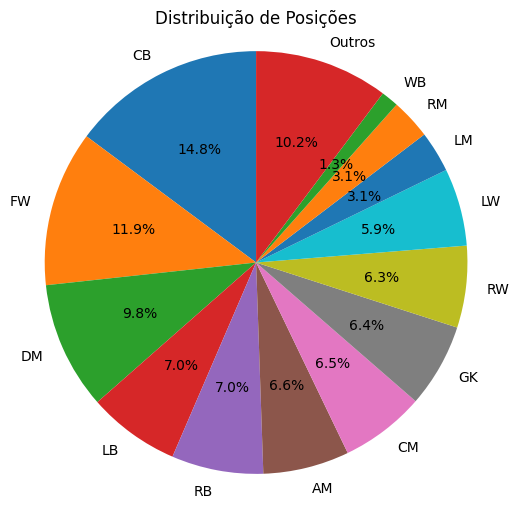

In [11]:
counts = df['Pos.'].value_counts()
total = counts.sum()
perc = counts / total * 100

major = counts[perc >= 1]
minor_sum = counts[perc < 1].sum()
grouped = major.copy()
if minor_sum > 0:
    grouped['Outros'] = minor_sum

plt.figure(figsize=(6, 6))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuição de Posições')
plt.show()

In [12]:
print(df['Pos.'].value_counts())
print(df.groupby('Pos.')['Gols'].describe())

Pos.
CB             1731
FW             1390
DM             1141
LB              823
RB              820
               ... 
FW,RM,RW          1
RM,CM,DM          1
AM,FW,RW,LW       1
LB,RB             1
DM,AM,RW          1
Name: count, Length: 195, dtype: int64
          count      mean       std  min  25%  50%  75%  max
Pos.                                                        
AM        770.0  0.125974  0.347348  0.0  0.0  0.0  0.0  2.0
AM,CM      22.0  0.090909  0.294245  0.0  0.0  0.0  0.0  1.0
AM,CM,DM    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
AM,CM,FW    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
AM,CM,RW    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
...         ...       ...       ...  ...  ...  ...  ...  ...
WB,LB       6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
WB,LW       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
WB,RB       5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
WB,RM       1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
WB,R

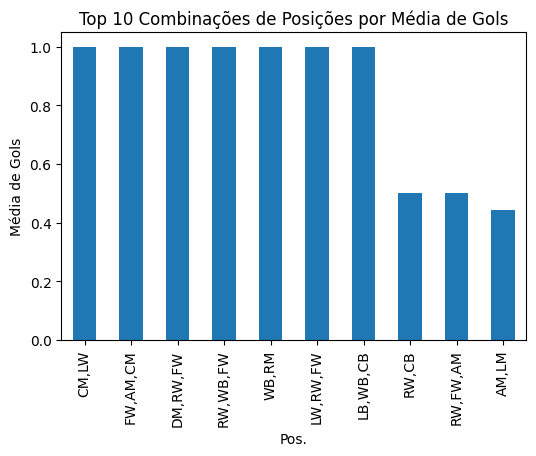

In [13]:
df['Pos_main'] = df['Pos.'].str.split(',', expand=True)[0]
freq = df['Pos_main'].value_counts(normalize=True)

media_goals = df.groupby('Pos.')['Gols'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
media_goals.plot(kind='bar')
plt.ylabel('Média de Gols')
plt.title('Top 10 Combinações de Posições por Média de Gols')
plt.show()

    Idade  Anos
0  37-150  37.0
1  34-325  34.0
2  28-056  28.0
3  31-303  31.0
4  33-267  33.0


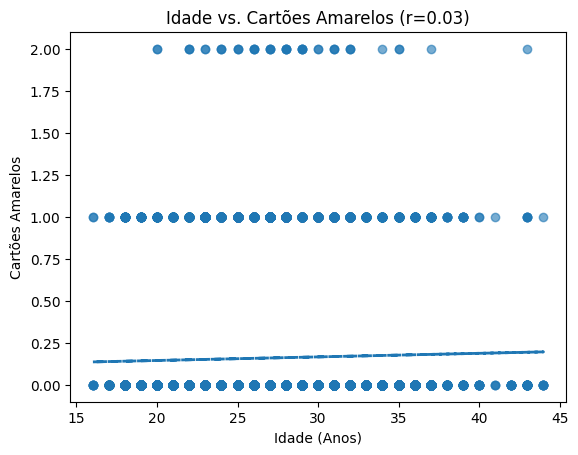

In [14]:
df = pd.read_csv('/content/database.csv', sep=',', encoding='utf-8')
df['Idade'] = df['Idade'].astype(str)

df['Anos'] = df['Idade'].str.split('-', n=1).str[0]

df['Anos'] = pd.to_numeric(df['Anos'], errors='coerce')

print(df[['Idade','Anos']].head())

data = df[['Anos','CrtsA']].dropna()

x = data['Anos']
y = data['CrtsA']
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, alpha=0.6)
plt.plot(x, m*x + b, '--', linewidth=2)
plt.xlabel('Idade (Anos)')
plt.ylabel('Cartões Amarelos')
plt.title(f'Idade vs. Cartões Amarelos (r={data["Anos"].corr(data["CrtsA"]):.2f})')
plt.show()